In [1]:
import sys
!{sys.executable} -m pip install yellowbrick

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from yellowbrick.target.feature_correlation import feature_correlation

In [2]:
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [41]:
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)

dataset.dropna(inplace = True)

In [42]:
x = dataset.iloc[:, 0:79].values
y = dataset.iloc[:, 79].values
y=y.astype('int')

In [43]:
features = np.array(dataset.columns)
features=features.astype(str)
features

array(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen',
       'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain',
       'ldl_path', 'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain',
       'dld_path', 'dld_filename', 'dld_getArg', 'urlLen', 'domainlength',
       'pathLength', 'subDirLen', 'fileNameLen', 'this.fileExtLen',
       'ArgLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio',
       'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable',
       'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName',
       'CharacterContinuityRate', 'LongestVariableValue',
       'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount',
       'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount',
       'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount',
       'Filename_LetterCount', 'Extension_LetterCount',
       'Query_LetterCount', 'LongestPa

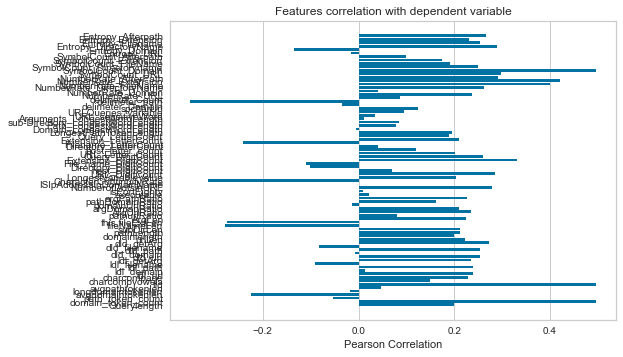

In [46]:
visualizer = FeatureCorrelation(labels=features)


visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [49]:
features[0]

'Querylength'

In [40]:
x = dataset.iloc[:, 0:10].value
visualizer = feature_correlation(x, y, labels=features)
plt.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'value'

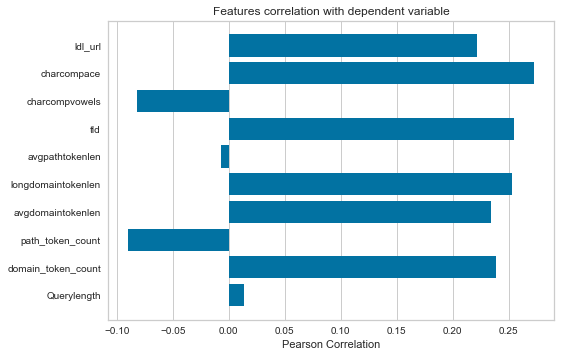

<Figure size 576x396 with 0 Axes>

In [9]:
x = dataset.iloc[:, 10:20].values
visualizer = feature_correlation(x, y, labels=features)
plt.tight_layout()

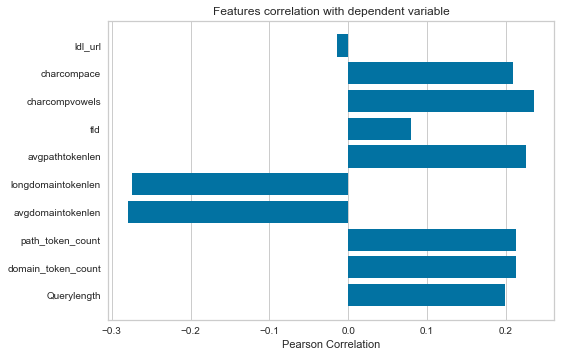

<Figure size 576x396 with 0 Axes>

In [10]:
x = dataset.iloc[:, 20:30].values
visualizer = feature_correlation(x, y, labels=features)
plt.tight_layout()

In [16]:
corr = dataset.corr()
corr

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
Querylength,1.000000,0.030592,-0.052212,-0.066229,0.017504,-0.176508,0.030592,0.864846,0.889990,0.974023,...,-0.076604,0.060321,0.058680,0.072607,-0.487933,0.031136,0.061493,-0.036492,-0.040179,0.224499
domain_token_count,0.030592,1.000000,0.018068,-0.334931,-0.045492,-0.015605,1.000000,0.052043,0.082688,0.035746,...,0.204669,0.093521,0.083806,0.050450,-0.089976,-0.455533,0.141261,0.134546,0.107112,0.071966
path_token_count,-0.052212,0.018068,1.000000,0.007349,0.057164,-0.027371,0.018068,0.319439,0.269793,-0.044904,...,0.341223,0.421213,0.449087,0.512481,-0.492504,-0.112531,-0.297603,-0.345116,-0.331247,0.346615
avgdomaintokenlen,-0.066229,-0.334931,0.007349,1.000000,0.884457,-0.112454,-0.334931,-0.076195,-0.077320,-0.068758,...,0.062710,-0.087233,-0.086657,-0.021543,-0.135720,-0.108162,-0.037608,-0.007005,-0.046495,-0.149897
longdomaintokenlen,0.017504,-0.045492,0.057164,0.884457,1.000000,-0.135675,-0.045492,0.023080,0.032655,0.018413,...,0.115436,0.000713,0.001575,0.036117,-0.214948,-0.250279,0.014249,0.023135,-0.026038,-0.066396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Entropy_Domain,0.031136,-0.455533,-0.112531,-0.108162,-0.250279,0.067893,-0.455533,-0.018827,-0.019513,0.031493,...,-0.164217,-0.069755,-0.072714,-0.106335,0.145902,1.000000,-0.022338,-0.031733,-0.012262,-0.104364
Entropy_DirectoryName,0.061493,0.141261,-0.297603,-0.037608,0.014249,0.061712,0.141261,-0.030118,0.019606,0.080728,...,0.336184,0.348429,0.286446,0.167926,0.119810,-0.022338,1.000000,0.968963,0.954354,0.183218
Entropy_Filename,-0.036492,0.134546,-0.345116,-0.007005,0.023135,0.064871,0.134546,-0.139433,-0.091692,-0.013797,...,0.396831,0.223266,0.159480,0.063705,0.185721,-0.031733,0.968963,1.000000,0.973184,0.086078
Entropy_Extension,-0.040179,0.107112,-0.331247,-0.046495,-0.026038,0.072322,0.107112,-0.142273,-0.099411,-0.019687,...,0.363441,0.214024,0.151086,0.055365,0.204339,-0.012262,0.954354,0.973184,1.000000,0.084645


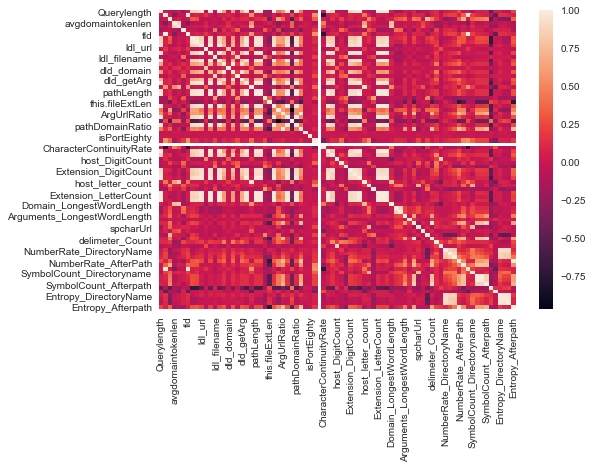

In [19]:
sns.heatmap(corr)

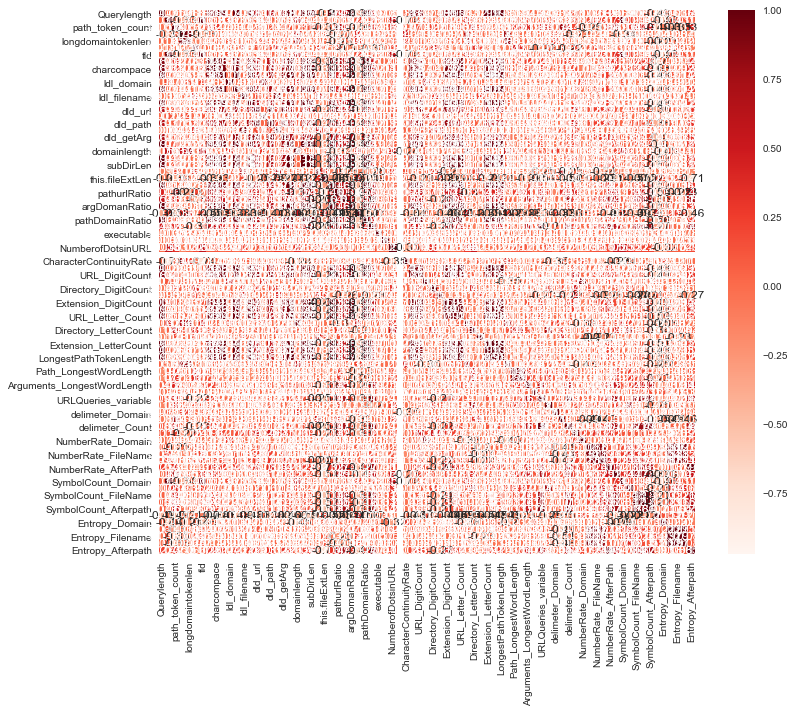

In [23]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
#Correlation with output variable
cor_target = abs(cor["Querylength"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Querylength               1.000000
charcompvowels            0.864846
charcompace               0.889990
ldl_url                   0.974023
ldl_path                  0.974603
ldl_getArg                0.984117
dld_url                   0.609483
dld_path                  0.611963
dld_getArg                0.684248
urlLen                    0.972217
pathLength                0.973593
subDirLen                 0.973593
ArgLen                    0.986030
ArgUrlRatio               0.542290
argDomanRatio             0.987405
pathDomainRatio           0.962319
LongestVariableValue      0.998513
URL_DigitCount            0.861276
Extension_DigitCount      0.904326
Query_DigitCount          0.951483
URL_Letter_Count          0.980193
Extension_LetterCount     0.989242
Query_LetterCount         0.998111
LongestPathTokenLength    0.984098
Name: Querylength, dtype: float64

In [26]:
import statsmodels.api as sm

In [28]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

array([7.75573372e-089, 6.72927893e-001, 2.51060355e-007, 9.83296791e-002,
       1.85414690e-130, 9.22349033e-018, 6.72927893e-001, 2.27861894e-034,
       3.36032871e-018, 6.33492589e-001, 7.07179463e-001, 7.05712513e-001,
       1.12953708e-001, 4.78060873e-019, 9.59852335e-001, 8.13313103e-002,
       2.84525754e-003, 1.59715021e-001, 2.15900732e-009, 8.99271953e-001,
       4.89284791e-001, 5.19177545e-003, 5.19177545e-003, 1.07378958e-002,
       1.08096676e-034, 1.30577276e-008, 5.06755284e-008, 2.14375805e-045,
       2.66553664e-004, 8.80186739e-015, 1.46111622e-014, 4.10976538e-052,
       2.51027235e-003, 2.06460855e-004, 9.80523471e-001, 1.85742620e-011,
       6.35118587e-016, 1.22737105e-033, 3.22850389e-017, 3.39846448e-001,
       3.90395434e-009, 1.43605883e-008, 4.08050742e-014, 1.86749156e-071,
       4.63116296e-001, 8.72202369e-001, 1.28537101e-032, 8.24856695e-020,
       8.44803955e-016, 1.20915488e-059, 3.00183341e-024, 5.14546107e-017,
       9.88837318e-001, 5